# Exploring Machine learning algorithms 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split,cross_val_score,KFold, cross_val_predict, GridSearchCV




In [2]:
### Load the data ###
df = pd.read_csv("C:/Users/viswa/Downloads/dataset_assignment1.csv")
X=df.iloc[:,:-1]
y=df.iloc[:, -1]

In [3]:
### Information of the data ###

print("Data Information:")
print(X.info())

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   feature1  700 non-null    int64
 1   feature2  700 non-null    int64
 2   feature3  700 non-null    int64
 3   feature4  700 non-null    int64
 4   feature5  700 non-null    int64
 5   feature6  700 non-null    int64
 6   feature7  700 non-null    int64
 7   feature8  700 non-null    int64
 8   feature9  700 non-null    int64
dtypes: int64(9)
memory usage: 49.3 KB
None


In [4]:
### Number of samples per class ###

print("\nNumber of samples for each class:")
print(y.value_counts())


Number of samples for each class:
class
0    459
1    241
Name: count, dtype: int64


In [5]:
### statistical description of features for each class ###

for class_label in y.unique():
    print("\nStatistical description of features for class", class_label)
    class_data = X[y == class_label]
    print(class_data.describe())


Statistical description of features for class 0
         feature1    feature2    feature3    feature4    feature5    feature6  \
count  459.000000  459.000000  459.000000  459.000000  459.000000  459.000000   
mean     2.956427    1.324619    1.442266    1.363834    2.119826    1.437908   
std      1.672490    0.906830    0.996960    0.995886    0.916145    1.310839   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      1.000000    1.000000    1.000000    1.000000    2.000000    1.000000   
50%      3.000000    1.000000    1.000000    1.000000    2.000000    1.000000   
75%      4.000000    1.000000    1.000000    1.000000    2.000000    1.000000   
max      8.000000    9.000000    8.000000   10.000000   10.000000   10.000000   

         feature7    feature8    feature9  
count  459.000000  459.000000  459.000000  
mean     2.102397    1.289760    1.063181  
std      1.079976    1.057787    0.501456  
min      1.000000    1.000000    1.000000  
2

C:\Users\viswa\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


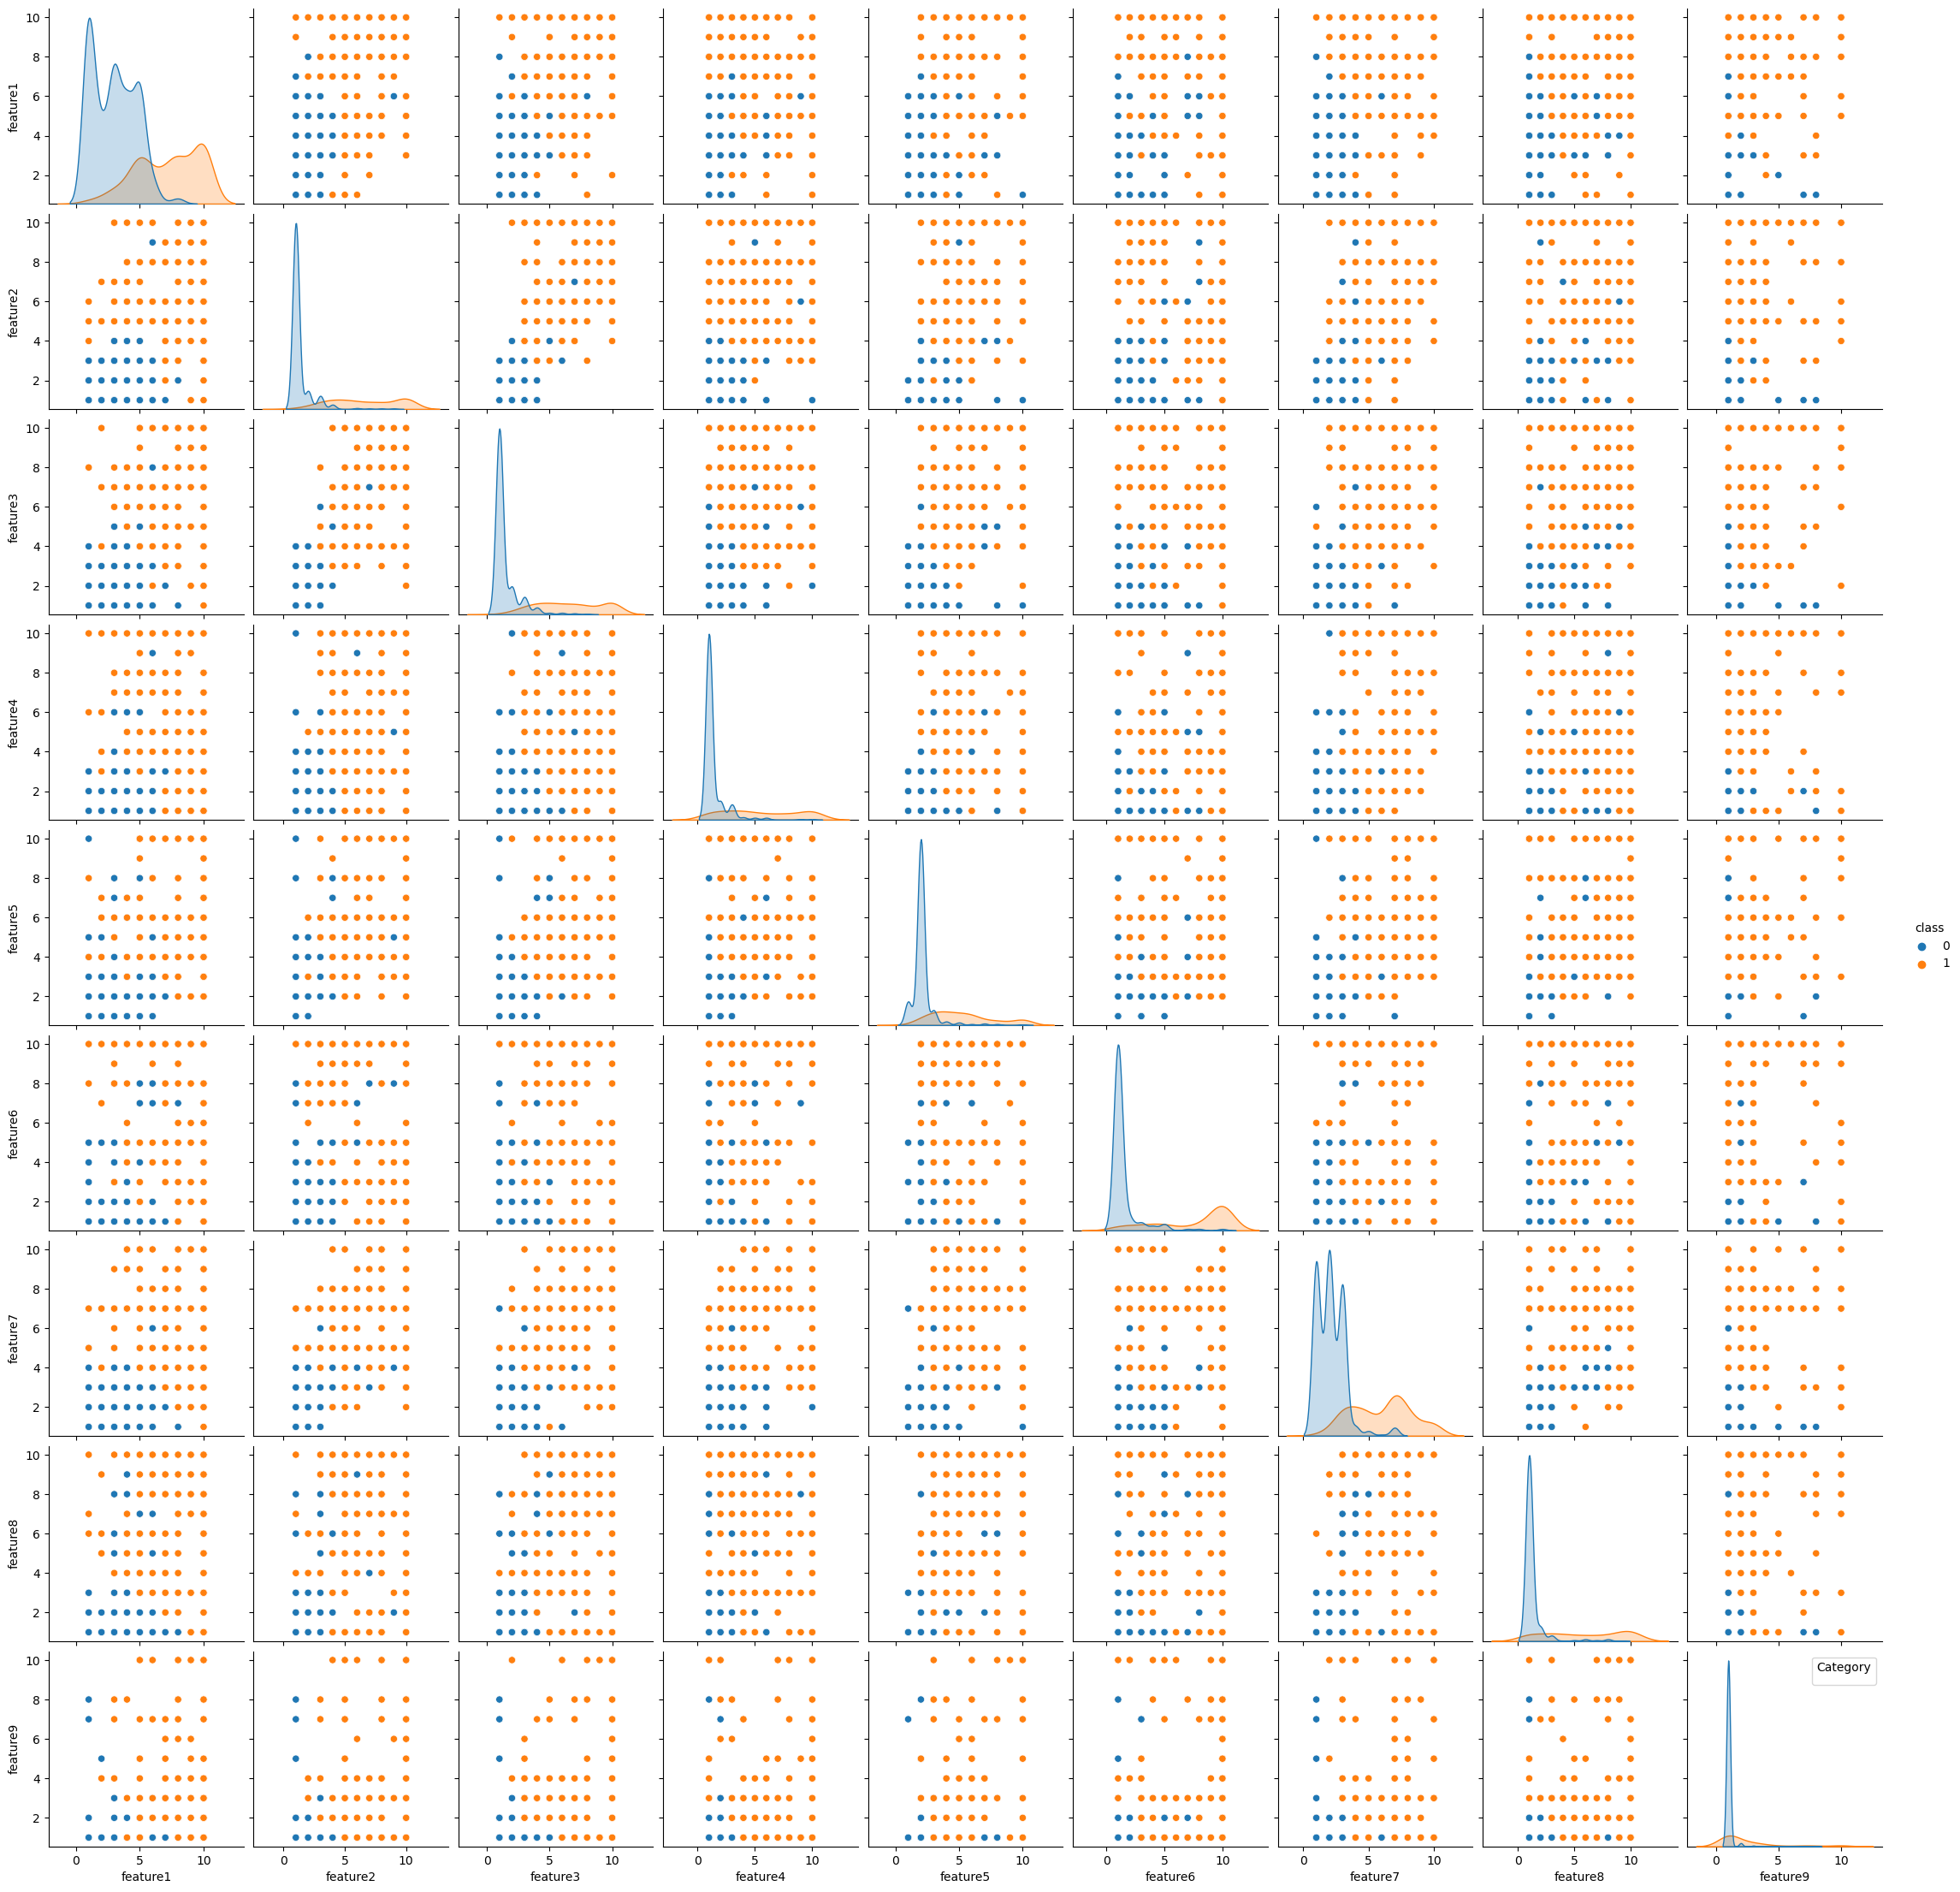

In [6]:
### Plot of all 9 features as per the class ###

sns.pairplot(df, hue='class')
plt.legend(title='Category')  # Add a legend with a title
plt.show()

In [62]:
random_seed = 42
np.random.seed(random_seed)

In [158]:
                    ### Split the data into training and testing data ###
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

In [159]:
                        ### Decision Tree Classifier ###

In [259]:
### introducing kfold ###

kfold = KFold(n_splits=5, shuffle=True)

In [306]:
### Extract best parameters using k fold cross calidation ###

best_accuracy = 0
best_parameters = {}
for criterion in ['entropy']:
    for max_depth in [2,3,4,5]:
        for min_samples_leaf in [5, 10]:
            model = DecisionTreeClassifier(max_depth=max_depth, criterion=criterion, min_samples_leaf=min_samples_leaf)
            cross_val_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring = 'accuracy')
            avg_accuracy = cross_val_scores.mean()
            if avg_accuracy > best_accuracy:
                best_accuracy = avg_accuracy
                best_parameters = {'criterion': criterion, 'max_depth': max_depth, 'min_samples_leaf': min_samples_leaf}
print("Best parameters:", best_parameters)

Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5}


In [307]:
### Fit the model with the best parameters on the training data ###
best_model = DecisionTreeClassifier(criterion='entropy',max_depth=5, min_samples_leaf=10)
best_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10)

In [308]:
### Prediction is done on the testing data and Accuracy is calculated ###

y_prediction = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_prediction)
print("Accuracy:", accuracy)

Accuracy: 0.95


In [309]:
### Classification report ###

precision = precision_score(y_test, y_prediction)
print("Precision:", precision)
recall = recall_score(y_test, y_prediction)
print("Recall:", recall)
f1_score = 2 * (precision * recall) / (precision + recall)
print("F1-score:", f1_score)


Precision: 0.9534883720930233
Recall: 0.8913043478260869
F1-score: 0.9213483146067417


In [310]:
### Confusion matrics ###

cm = confusion_matrix(y_test, y_prediction)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[92  2]
 [ 5 41]]


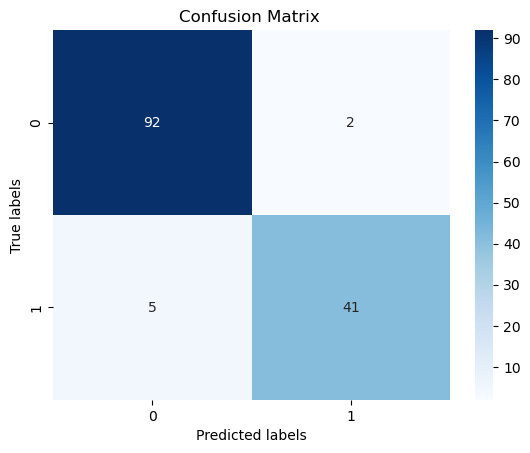

In [311]:
### plot confusion matrics ###

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix ' )
plt.show()

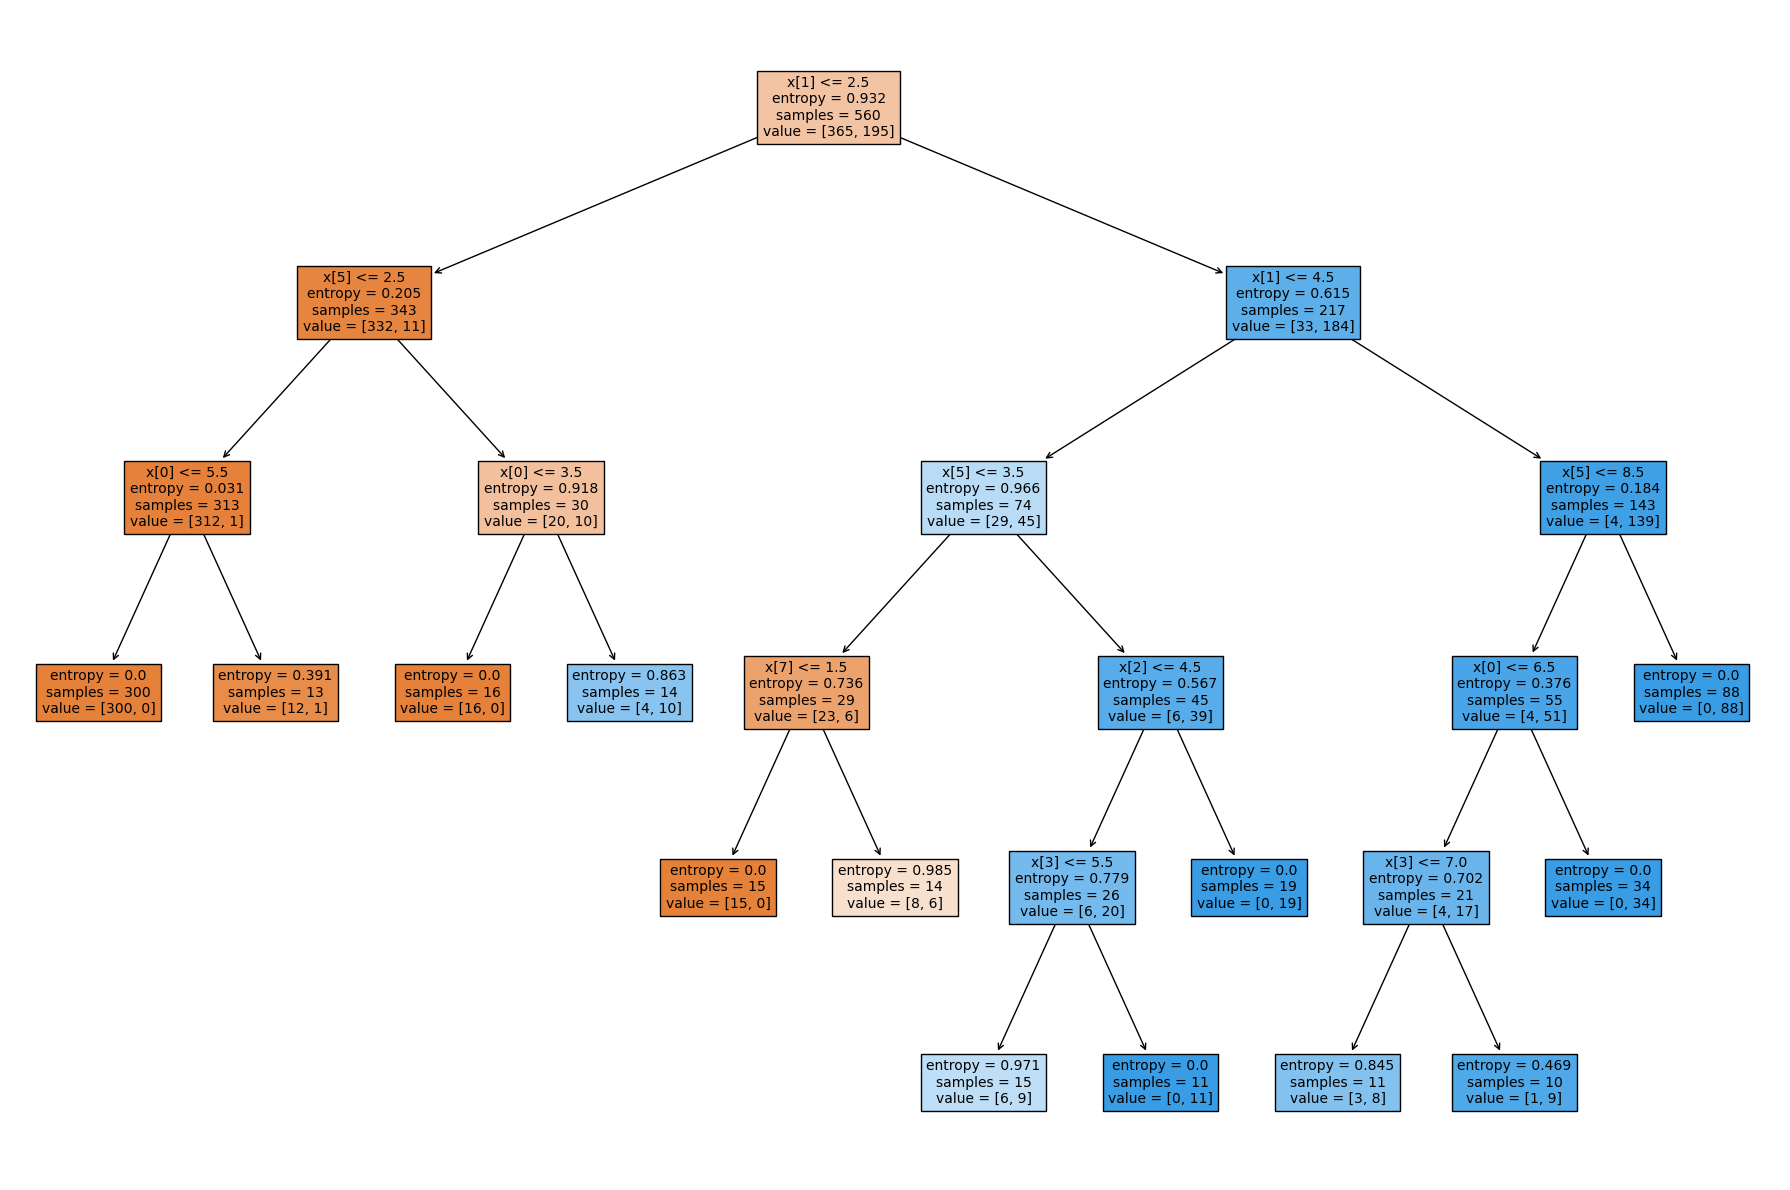

In [268]:
                ### Plot Decision Tree ###
    
plt.figure("Decision Tree",figsize=[18,12])
plot_tree(best_model, fontsize=10, filled=True, feature_names=None, class_names=None)
plt.tight_layout()
plt.show()

In [269]:
                        ### KNN Classifier ###

In [270]:
### introducing kfold ###

kfold = KFold(n_splits=5, shuffle=True, random_state=random_seed)

In [271]:
### for different values of k find the best hyperparameters using k fold cross validation ###

avg_accuracies = {}
best_kvalue = None
best_accuracy = 0
k_values = [3, 4, 5, 6]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=kfold, scoring = 'accuracy',) 
    avg_accuracy = scores.mean()
    avg_accuracies[k] = avg_accuracy
    if avg_accuracy > best_accuracy:
        best_accuracy = avg_accuracy
        best_kvalue = k
print("Best k:", best_kvalue)

Best k: 5


In [272]:
### fit the KNN with best parameter which was extracted from above ###

knn = KNeighborsClassifier(n_neighbors=best_kvalue)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [273]:
### Predictions are done on the model ###

y_pred = knn.predict(X_test)
Accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", Accuracy)

Accuracy: 0.9857142857142858


In [274]:
### Classification report ###

precision = precision_score(y_test, y_pred)
print("Precision:", precision)
Recall = recall_score(y_test, y_pred)
print("Recall:", Recall)
f1_score = 2 * (precision * recall) / (precision + recall)
print("F1-score:", f1_score)


Precision: 0.9782608695652174
Recall: 0.9782608695652174
F1-score: 0.9327603640040445


In [275]:
### Confusion matrics ###

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[93  1]
 [ 1 45]]


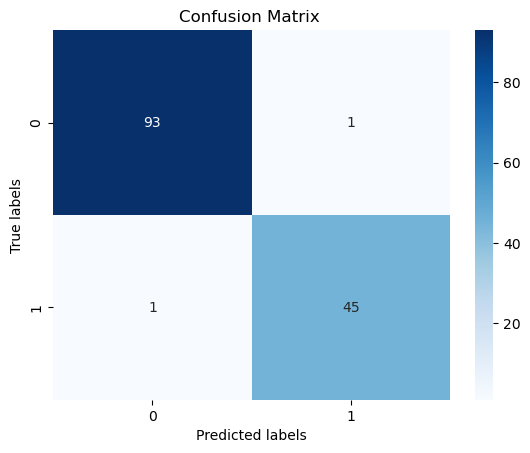

In [276]:
### plot Confusion Matrics ###

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix ' )
plt.show()

In [277]:
                    ### Random Forest ###

In [299]:
### introducing kfold ###

kfold = KFold(n_splits=5, shuffle=True, random_state=random_seed)

In [300]:
### find the best hyperparameters using k fold cross validation ###


random_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1],
    #'bootstrap': [True, False]
}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=random_grid, cv=kfold, n_jobs =4,)
grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
print(best_parameters)

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


In [301]:
### fit the rf classifier with best parameter which was extracted from above ###

best_rf = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_split=5)
best_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=50)

In [302]:
### Predictions are done on the model ###

y_prediction = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_prediction)
print("Accuracy:", accuracy)

Accuracy: 0.9642857142857143


In [303]:
### Classification report ###

precision = precision_score(y_test, y_pred)
print("Precision:", precision)
Recall = recall_score(y_test, y_pred)
print("Recall:", Recall)
f1_score = 2 * (precision * recall) / (precision + recall)
print("F1-score:", f1_score)

Precision: 0.9782608695652174
Recall: 0.9782608695652174
F1-score: 0.9327603640040445


In [304]:
### Confusion matrics ###

cm = confusion_matrix(y_test, y_prediction)
print(cm)

[[92  2]
 [ 3 43]]


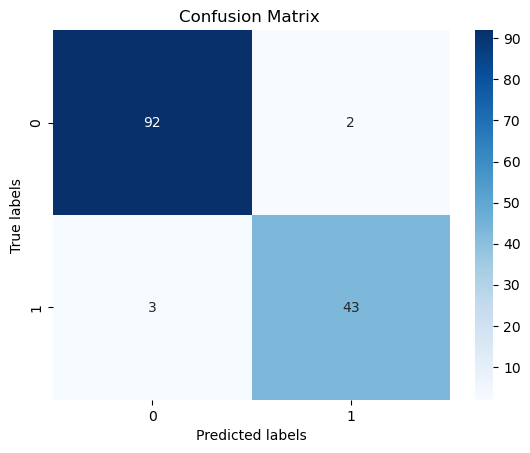

In [305]:
### plot Confusion Matrics ###

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix ' )
plt.show()